In [1]:
#



In [2]:
#

import numpy as np

import matplotlib.pyplot as plt

from nn_vec import NeuralNetwork, Layer

np.random.seed(42)


In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1)
mnist.keys()


/home/michael/miniconda3/envs/neural_network_test/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
np.savetxt("data/mnist_data.csv", X, fmt = '%d', delimiter=",")
np.savetxt("data/mnist_target.csv", Y, fmt = '%d', delimiter=",")

# XX = np.loadtxt("data/mnist_data.csv", delimiter=",")
# YY = np.loadtxt("data/mnist_target.csv", delimiter=",")

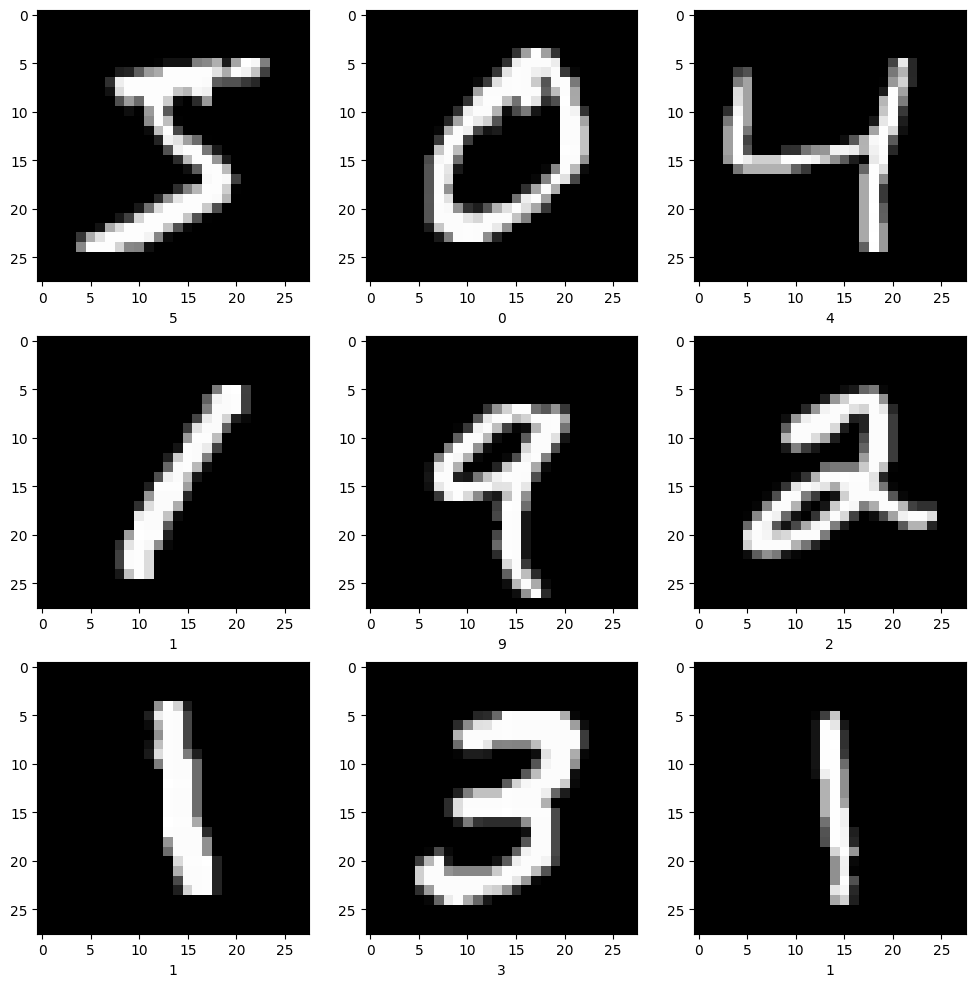

In [11]:
#

# X = np.asarray(mnist["data"])
# X = X/255
# m, n = X.shape

# Y = np.asarray(mnist["target"], dtype=int)

X = np.loadtxt("data/mnist_data.csv", delimiter=",")
X = X/255
Y = np.loadtxt("data/mnist_target.csv", delimiter=",", dtype=int)

# np.random.shuffle(data) # shuffle before splitting into dev and training sets

# data_dev = data[0:1000].T
# Y_dev = data_dev[0]
# X_dev = data_dev[1:n]
# X_dev = X_dev / 255.

# data_train = data[1000:m].T
# Y_train = data_train[0]
# X_train = data_train[1:n]
# X_train = X_train / 255.
# _,m_train = X_train.shape

X_train = X[0:60000,:].T
X_test = X[60000:,:].T

Y_train = Y[0:60000]
Y_test = Y[60000:]

#

plt.figure(figsize=(12,12))
for kp in range(9):
    plt.subplot(3,3,kp+1)
    plt.imshow(X[kp,:].reshape(28,28), cmap=plt.get_cmap('gray'))
    plt.xlabel(Y[kp])
plt.show()


In [12]:
#

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y = np.zeros((Y.size, 10))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(Y_pred, Y):
    print("Predictions:", Y_pred)
    print("Values:", Y)
    return np.sum(Y_pred == Y) / Y.size

def gradient_descent(NN: "NeuralNetwork", X, Y, alpha, iterations):
    # W1, b1, W2, b2 = init_params()
    for k1 in range(iterations):
        # Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        NN._compute_output(X)
        # dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        NN._train_step(X, one_hot(Y), alpha)
        # W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        Y_pred = nn._compute_output(X)
        if k1 % 10 == 0:
            print("")
            print("Iteration: ", k1)
            Y_pred = get_predictions(nn._compute_output(X))
            print(f"Train accuracy: {get_accuracy(Y_pred, Y):0.4f}")

#
nn = NeuralNetwork()

layer_list = []
# layer_list.append(Layer())

L01 = Layer("input", 784, None)
L02 = Layer("hidden", 28, "relu")
L03 = Layer("output", 10, "softmax")
layer_list = [L01, L02, L03]

nn._set_layers(layer_list)

gradient_descent(nn, X_train, Y_train, 0.10, 300)

print("\n\nTraining Complete")
Y_pred = get_predictions(nn._compute_output(X_test))
print(f"Test accuracy: {get_accuracy(Y_pred, Y_test):0.4f}")



Neural Network NN02 initialized
Layer L04 initialized | Type: input | Neurons: 784
Layer L05 initialized | Type: hidden | Neurons: 28
Layer L06 initialized | Type: hidden | Neurons: 10

Iteration:  0
Predictions: [3 6 5 ... 9 6 6]
Values: [5 0 4 ... 5 6 8]
Train accuracy: 0.1642

Iteration:  10
Predictions: [3 0 5 ... 3 6 0]
Values: [5 0 4 ... 5 6 8]
Train accuracy: 0.4053

Iteration:  20
Predictions: [3 0 5 ... 3 6 8]
Values: [5 0 4 ... 5 6 8]
Train accuracy: 0.6008

Iteration:  30
Predictions: [3 0 5 ... 3 6 8]
Values: [5 0 4 ... 5 6 8]
Train accuracy: 0.6872

Iteration:  40
Predictions: [3 0 5 ... 3 6 8]
Values: [5 0 4 ... 5 6 8]
Train accuracy: 0.7350

Iteration:  50
Predictions: [3 0 5 ... 3 6 8]
Values: [5 0 4 ... 5 6 8]
Train accuracy: 0.7661

Iteration:  60
Predictions: [3 0 5 ... 3 6 8]
Values: [5 0 4 ... 5 6 8]
Train accuracy: 0.7884

Iteration:  70
Predictions: [3 0 5 ... 3 6 8]
Values: [5 0 4 ... 5 6 8]
Train accuracy: 0.8054

Iteration:  80
Predictions: [3 0 5 ... 5 6 8]
V

In [ ]:
nn.layer_list[2].weights.shape

In [9]:
type(X_train)

numpy.ndarray

In [ ]:
X.shape

In [ ]:
# np.savetxt("data/mnist_data.csv",X*255, fmt = '%d', delimiter=",")
# np.savetxt("data/mnist_target.csv",Y, fmt = '%d', delimiter=",")